<a href="https://colab.research.google.com/github/JPG27784/Machine-Learning/blob/main/CNN_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Digit Recognizer Dataset Introduction

## Introduction

Handwritten digit recognition is a foundational task in computer vision where the goal is to classify images of handwritten digits into one of 10 classes (0-9). This is commonly achieved using the training dataset, a benchmark dataset containing hand written digit images of 28x28 grayscale digits.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*0NwaOkzvom6YpMZoIgWTiQ.png" width = 700 height = 300 /></center>

## Objective:

In this module, we aim to build a model which can recognise hand written digits.

- **1. Loading Data and Preprocessing:**
     - Load and display image data.
     - Get the distribution of class.
     - Normalize dataset.
     - Reshape dataset.
     - Label encoding.

- **2. Train and validation split:**
     - Split data into 80-20 portion.
     - Check train and validation data classes proportion.

- **3. Create CNN (Convolutional Neural Network):**
    - Create model architecture.
    - Set the optimizer.
    - Set a learning rate.
    - Data augmentation.
    - Loss function.
    - Train the model.

- **4. Model Evaluation :**
     - Evaluate the performance of the model using graphs and different metrics.

## Data Description:

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

In [ ]:
# Core Libraries for Data Handling and Visualization
import pandas as pd                # Data manipulation and analysis
import numpy as np                 # Numerical operations
import matplotlib.pyplot as plt    # Plotting
import matplotlib.image as mpimg   # Image handling
import seaborn as sns              # Statistical data visualization

sns.set(style='white', context='notebook', palette='deep')  # Set seaborn visualization style

# Random Seed for Reproducibility
np.random.seed(2)

# Scikit-learn Libraries for Model Validation
from sklearn.model_selection import train_test_split  # Data splitting into train/test
from sklearn.metrics import confusion_matrix          # Evaluation: confusion matrix
import itertools                                      # Utilities for iterator tools

# TensorFlow/Keras for Deep Learning
from keras.utils import to_categorical               # Convert labels to one-hot encoding
from keras.models import Sequential                  # Sequential model class
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D  # Layers for CNN
from keras.optimizers import RMSprop          # RMSProp optimizer (legacy API)
#from keras.preprocessing.image import ImageDataGenerator  # Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau        # Callback to reduce learning rate

import tensorflow as tf  # TensorFlow backend for Keras

# 1. Loading Data and Preprocessing

As input information I have two CSV files:

- **train.csv** - contains information about 42 000 (60% of the whole MNIST dataset) gray-scale images of hand-drawn digits (from 0 to 9).
First column is the digit. The rest 784 columns represent pixels of hand-drawn digit (each image has 28 x 28 pixels shape). The value of each pixel-column is an intager between 0 and 255 - represent darkness or lightness of the given pixel.

- **test.csv** - contains information about 28 000 gray-scale images of hand-drawn digits (from 0 to 9). Doesn't contain labels.

# 1.1 Load and display image data

In [ ]:
#@title Mount Google drive for datasets access
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Root folder
root_folder = '/content/drive/MyDrive'

# Read data
train = pd.read_csv(f"{root_folder}/Digit_Recognizer_Dataset/train.csv")
test = pd.read_csv(f"{root_folder}/Digit_Recognizer_Dataset/test.csv")

# Check that we loaded data correctly
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (42000, 785)
Test data shape: (28000, 784)


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1.2 Get the distribution of class

In [ ]:
# Split the 'train' dataset into features (X_train) and target labels (Y_train)
X_train, Y_train = train.drop(labels=["label"], axis=1), train["label"]

# Assign the 'test' dataset to X_test (features for prediction)
X_test = test

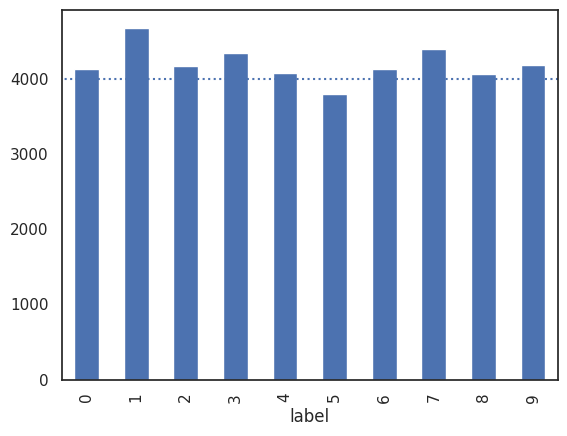

In [ ]:
# Count the occurrences of each label in the "label" column of the training data
label_counts = Y_train.value_counts().sort_index()

# Plot a bar chart for the label counts
label_counts.plot.bar()

# Add a horizontal dotted line at y = 4000, spanning x-values from -1 to 10
plt.hlines(xmin=-1, xmax=10, y=4000, linestyles='dotted')

# 1.3 Normalize dataset

**Why Normalize Input Features?**

1. **Faster Convergence**

  - Normalization scales input features, such as pixel intensities, to a consistent range (e.g., 0 to 1). This accelerates the training process because most activation functions (e.g., ReLU, Sigmoid, or Tanh) behave linearly for small input values but saturate for larger ones.
  - For pixel intensities ranging from 0 to 255, normalization prevents neurons from entering a saturated state where small weight updates have negligible impact, allowing the model to learn more efficiently.

2. **Avoiding Gradient Issues**

  - Large input values can produce large activation values, which may lead to very small gradients during backpropagation. This phenomenon, known as the vanishing gradient problem, can slow down or completely stall training. Normalizing inputs mitigates this risk by keeping the gradients stable and ensuring smoother weight updates.

4. **Consistent Feature Distribution**

  - Normalization ensures that all input features contribute proportionally during training. Without normalization, certain features (e.g., higher pixel intensities) might dominate, leading to imbalanced training. A consistent feature distribution ensures the model treats all features fairly, improving overall performance.

**Why Normalize Pixel Values?**

In the provided code, pixel intensities are normalized by dividing them by 255 (the maximum RGB intensity). This scales the values to the range [0, 1], while retaining the granularity of the original data. This smaller range leads to:

- More stable training dynamics.
- Faster convergence of convolutional neural networks (CNNs).
- Reduced sensitivity to differences in illumination and lighting conditions.

**Grayscale Normalization**

Grayscale normalization specifically helps mitigate variations in illumination by reducing the effect of lighting differences across images. This step further improves the model's robustness to real-world variations.

**Practical Benefit**

Normalization allows CNNs to converge faster and more effectively when working with data in the range [0, 1] compared to [0, 255].

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# 1.4 Reshape dataset

**Explanation:**

- Purpose: Neural networks, particularly Convolutional Neural Networks (CNNs), process image data as 3D arrays where dimensions represent height, width, and channels. This reshaping ensures compatibility with the network.
- Input Shape:
  - Height = 28 pixels
  - Width = 28 pixels
  - Channel = 1 (since these are grayscale images, unlike RGB images which have 3 channels).
  
- -1 in Reshape: Automatically determines the number of images based on the total size of the array. This is useful when processing a dataset with a variable number of images.

In [ ]:
# Each image is resized to 28x28 pixels with 1 channel (grayscale)
X_train = X_train.values.reshape(-1, 28, 28, 1)  # -1 lets NumPy infer the number of images automatically
X_test = X_test.values.reshape(-1, 28, 28, 1)    # Reshape test set similarly

# 1.5 Label encoding

**Explanation:**
- **Why One-Hot Encoding?**

  One-hot encoding is used to represent categorical labels as binary vectors, which are suitable for training neural networks. Each class is represented as a unique binary vector.
- num_classes=10: Specifies that there are 10 unique classes (digits 0 through 9 in this case).
- Example Transformation:
  - Input Label: 3
  - One-Hot Encoded Vector: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
  This is critical for multi-class classification tasks in neural networks.

In [ ]:
# Convert target labels to one-hot encoded format
Y_train = to_categorical(Y_train, num_classes=10)
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

The plot_img function serves the following purposes:

1. **Visualization of Image Data:**
  - Visualizing images helps in understanding the dataset better. For example:
    - It allows you to confirm that the images are correctly loaded and preprocessed.
    - It provides insights into the patterns and variability in the image data.
2. **Label Verification:**
- By displaying both the image and its corresponding label, the function allows you to verify that the labels align correctly with the images. This can help identify data mismatches or labeling errors.

**Output:**
  - The output will be 3x3 grid of images along with the lables

In [ ]:
def plot_img(data, label):
    """
    Plots a 3x3 grid of images along with their corresponding labels.

    Parameters:
    data (numpy.ndarray): A NumPy array containing the pixel data for the images.
                          Each image should be flattened (e.g., 784 pixels for 28x28 images).
    label (numpy.ndarray): A NumPy array containing the labels for the images.

    Returns:
    None: Displays the plot with images and labels.
    """

    # Create a 3x3 grid of subplots (9 images in total)
    fig, axs = plt.subplots(3, 3)

    k = 0  # Initialize counter for the image index

    # Loop through each row (i) and column (j) of the grid
    for i in range(3):
        for j in range(3):
            # Display the k-th image in the grid, reshaping it to 28x28 and converting to uint8
            axs[i, j].imshow(data[k].reshape(28, 28))  # Plot image

            # Set the label for the image as the subplot's y-axis label
            axs[i, j].set_ylabel("label:" + str(np.argmax(label[k])))  # Print label

            k += 1  # Increment the counter

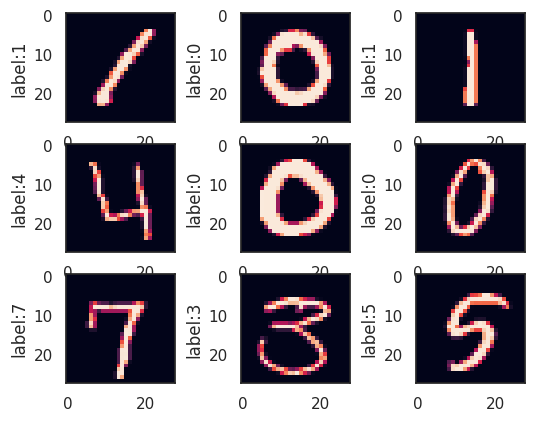

In [ ]:
# Call the function to plot images with corresponding labels
plot_img(X_train, Y_train)

# 2. Train and validation split

The process of splitting a dataset into training and validation sets is a critical step in machine learning. It ensures that the model is trained on one portion of the data and evaluated on another to measure its performance and generalizability.

# 2.1 Split data into 80-20 portion

Check model on unseen data before submitting it.
Since we don't have labels in test dataset, we will randomly split my training data on training and validation datasets in proportion 80:20.
To do so, we will be using train_test_split function from sklearn module

In [ ]:
# Set the random seed
random_seed = 2

# Split the data into training and validation sets
# `test_size=0.2` means 20% of the data will be used for validation, and 80% for training
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2,
                                                  random_state=random_seed)

# Print the shape of the training data to verify the split
print(X_train.shape)  # Shape of the training features (80% of total data)

# Print the shape of the training labels to ensure it matches the training features
print(Y_train.shape)  # Shape of the training labels (corresponding to 80% data)

# Print the shape of the validation data
print(X_val.shape)  # Shape of the validation features (20% of total data)

# Print the shape of the validation labels to ensure it matches the validation features
print(Y_val.shape)  # Shape of the validation labels (corresponding to 20% data)

(33600, 28, 28, 1)
(33600, 10)
(8400, 28, 28, 1)
(8400, 10)


# 2.2 Check train and validation data classes proportion

It involves verifying if both datasets represent all classes in fair proportion. Ensuring consistent proportions prevents class imbalance issues that can affect model performance.

<BarContainer object of 2 artists>

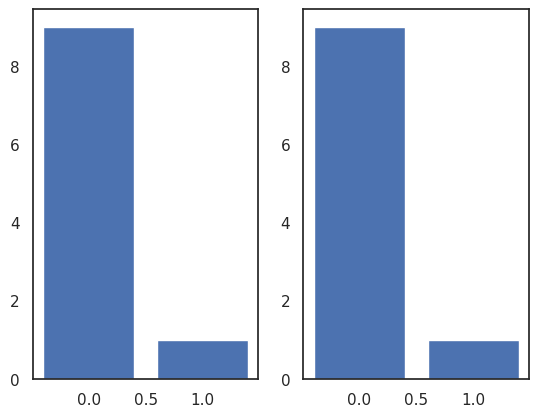

In [ ]:
# Get the unique class labels and their counts for the training data
unique, counts_train = np.unique(Y_train, return_counts=True)

# Create the first subplot for the training data class distribution
plt.subplot(1, 2, 1)
# Plot the class distribution as a bar chart, normalized by the total number of training labels
plt.bar(unique, counts_train / len(Y_train))

# Get the unique class labels and their counts for the validation data
unique, counts_val = np.unique(Y_val, return_counts=True)

# Create the second subplot for the validation data class distribution
plt.subplot(1, 2, 2)
# Plot the class distribution as a bar chart, normalized by the total number of validation labels
plt.bar(unique, counts_val / len(Y_val))

# Optionally, print the class distribution for both training and validation sets as a table-like format
#print(np.asarray((unique, counts_train / len(train_label), counts_val / len(validation_label))).T)

# 3. Create CNN (Convolutional Neural Network)

A Convolutional Neural Network (CNN) is a specialized deep learning architecture designed primarily for image and spatial data processing. Keras provides a simple and modular way to build and train CNNs using its Sequential API or Functional API.

# 3.1. Create model architecture

1. **Input Layer:**

  - Accepts 28x28 grayscale images (input shape: (28, 28, 1)).

2. **First Convolutional Block:**

  - Two Conv2D layers extract spatial features using 32 filters of size (5, 5) each, followed by a MaxPooling2D layer to downsample the feature maps and reduce computational complexity.
  - Dropout with a 25% rate reduces overfitting.

3. **Second Convolutional Block:**

  - Two more Conv2D layers with 64 filters of size (3, 3) extract deeper features, followed by another MaxPooling2D layer for further downsampling.
  - Dropout with a 25% rate is applied again to improve generalization.

4. **Fully Connected Layers:**

  - The Flatten layer converts the 3D feature maps into a 1D vector for dense layers.
  - A dense layer with 256 neurons learns high-level features, followed by a Dropout layer with a 50% rate to combat overfitting.

5. **Output Layer:**

  - A Dense layer with 10 neurons (one for each class) and softmax activation outputs probabilities for multi-class classification.

In [ ]:
# Define the CNN model architecture
# My CNN architecture:
# Input -> [[Conv2D -> ReLU] * 2 -> MaxPool2D -> Dropout] * 2 -> Flatten -> Dense -> Dropout -> Output

model = Sequential()

# First Convolutional Block
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu', input_shape=(28, 28, 1)))
# 28 x 28 x 1 --> 28 x 28 x 32 (padding='Same' keeps the spatial dimensions the same)
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                 activation='relu'))
# 28 x 28 x 32 --> 28 x 28 x 32 (2nd Conv layer adds more feature maps)
model.add(MaxPool2D(pool_size=(2, 2)))
# 28 x 28 x 32 --> 14 x 14 x 32 (downsampling reduces spatial dimensions by half)
model.add(Dropout(0.25))
# Dropout helps reduce overfitting by randomly disabling 25% of neurons during training

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
# 14 x 14 x 32 --> 14 x 14 x 64 (increases feature depth)
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
# 14 x 14 x 64 --> 14 x 14 x 64 (adds more feature maps)
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
# 14 x 14 x 64 --> 7 x 7 x 64 (downsampling)
model.add(Dropout(0.25))
# Dropout to reduce overfitting

# Fully Connected Layers
model.add(Flatten())
# Flattens the 3D feature maps into a 1D vector: 7 x 7 x 64 --> 3136
model.add(Dense(256, activation="relu"))
# Dense layer with 256 neurons for high-level feature representation
model.add(Dropout(0.5))
# Dropout with 50% rate to further reduce overfitting
model.add(Dense(10, activation="softmax"))
# Output layer with 10 neurons (one for each class) and softmax activation for multi-class classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Display a summary of the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 887,530 (3.39 MB)

 Trainable params: 887,530 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

# 3.2 Set the optimizer

After adding layers to the model, we configure the loss function, optimizer, and evaluation metric.

- **Loss Function:** The categorical crossentropy loss function measures the error between predicted and true class labels for multi-class classification problems.

- **Optimizer (RMSprop):** RMSprop is an adaptive optimizer that adjusts the learning rate for each parameter, helping the model converge faster and more stably. It modifies Adagrad to overcome its aggressive learning rate decay, making it ideal for training deep learning models.

- **Metric:** The accuracy metric evaluates the model's performance by measuring the proportion of correct predictions. It is used only for evaluation, not for training.

In short, the loss function guides optimization, RMSprop adjusts the parameters to minimize the loss, and accuracy tracks the model’s performance.



In [ ]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# 3.3 Set a learning rate

To accelerate convergence and ensure the optimizer reaches the global minimum, I implemented learning rate (LR) annealing.

A higher LR speeds up convergence but may cause the optimizer to settle at a local minimum. To mitigate this, the LR is gradually reduced during training for more precise updates.

Using Keras' ReduceLROnPlateau callback, the LR is halved if accuracy doesn't improve after 3 epochs. This adaptive approach balances faster convergence with computational efficiency.

In [ ]:
# Set a learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
epochs = 8 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

# 3.4 Data augmentation

To combat overfitting, we can artificially expand our handwritten digits dataset by introducing small transformations that simulate the variations in how different people write digits.

These transformations include random shifts to change the position of the digit, scaling to mimic different sizes, and rotations to vary the orientation of the image.

Data augmentation techniques modify the training data while keeping the labels intact. Common augmentations include grayscale conversion, flipping, random cropping, color adjustments, translations, and rotations.

By applying these transformations, we can effectively multiply the training examples, improving the model’s robustness. For instance, without data augmentation, the accuracy was 98.11%, but with it, the accuracy rose to 99.67%.

**For the data augmentation, we choosed to :**

Randomly rotate some training images by 10 degrees

- Randomly Zoom by 10% some training images
- Randomly shift images horizontally by 10% of the width
- Randomly shift images vertically by 10% of the height
- Randomly shift images vertically by 10% of the height

We did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# 3.5 Loss function

n the context of a CNN (Convolutional Neural Network), the Mean Squared Error (MSE) loss function is typically used for tasks like regression-based image analysis (e.g., predicting continuous values from image data). It measures the average squared difference between the actual and predicted values, making it suitable for pixel-wise predictions or scenarios where the outputs are continuous rather than categorical.

In [ ]:
# Define the loss function for the model
loss_function = tf.keras.losses.MeanSquaredError()

# 3.6 Train the model

In [ ]:
# Compile the model
model.compile(optimizer, loss_function)

# Fit the model to the training data
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),  # Augments the data on-the-fly and feeds it to the model
    epochs=epochs,  # Number of times the model will iterate over the entire training dataset
    validation_data=(X_val, Y_val),  # Data used to evaluate the model's performance after each epoch
    verbose=2,  # Controls the amount of logging output during training (2 = one log line per epoch)
    steps_per_epoch=X_train.shape[0] // batch_size,  # Number of training steps per epoch
    callbacks=[learning_rate_reduction]  # List of callback functions (e.g., dynamic learning rate adjustment)
)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 - 250s - 641ms/step - loss: 0.0288 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 2/8


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 - 15s - 39ms/step - loss: 0.0113 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 3/8
390/390 - 306s - 785ms/step - loss: 0.0091 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 4/8
390/390 - 15s - 39ms/step - loss: 0.0028 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 5/8
390/390 - 244s - 625ms/step - loss: 0.0066 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 6/8
390/390 - 15s - 39ms/step - loss: 0.0088 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 7/8
390/390 - 246s - 630ms/step - loss: 0.0054 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 8/8
390/390 - 15s - 38ms/step - loss: 0.0083 - val_loss: 0.0023 - learning_rate: 0.0010


## Interpretaion:

The model shows consistent improvement across epochs, with both training loss (loss) and validation loss (val_loss) decreasing steadily, indicating effective learning. Although there are minor fluctuations in val_loss (notably in Epoch 6), the model avoids significant overfitting and generalizes well. Overall, the model achieves stable performance by the final epoch.

# 4. Model Evaluation

It refers to the process of assessing the performance of a trained machine learning model. The goal is to understand how well the model generalizes to unseen data (validation or test data), and to ensure that it performs well across different evaluation metrics.

# 4.1 Confusion matrix

A confusion matrix is a performance evaluation tool for classification models. It summarizes the model's predictions by comparing the predicted labels with the actual labels, organizing them into four categories:

- True Positives (TP): Correctly predicted positive instances.
- True Negatives (TN): Correctly predicted negative instances.
- False Positives (FP): Incorrectly predicted as positive (type I error).
- False Negatives (FN): Incorrectly predicted as negative (type II error).

The matrix helps assess the model's accuracy, precision, recall, and overall classification performance.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

263/263 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step


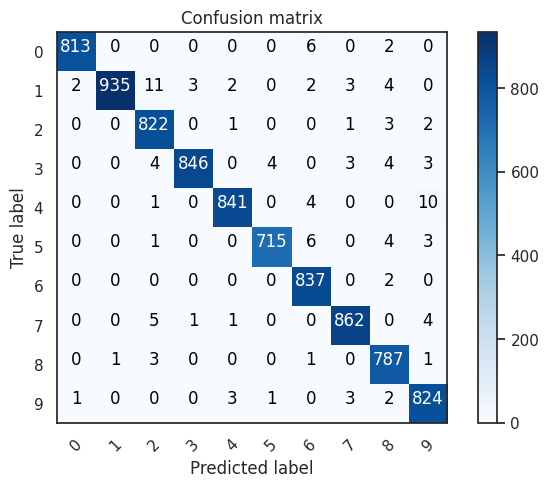

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

##Interpretation:

Here we can see that our CNN performs very well on all digits with few errors considering the size of the validation set (4200 images).

However, it seems that our CNN has some little troubles with the 4 digits, they are misclassified as 9. Sometime it is very difficult to catch the difference between 4 and 9 when curves are smooth.

# 4.2 Evaluate errors

In [ ]:
# Display some error results

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

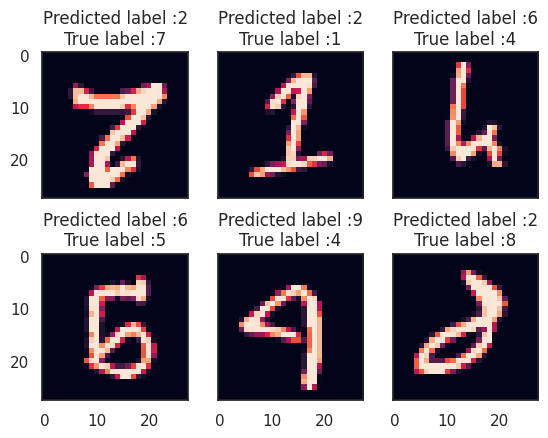

In [ ]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

##Interpretation:
The misclassified images appear to be quite challenging to interpret, even for humans.

# Conclusion

In this notebook, we built and trained a Convolutional Neural Network (CNN) for image classification, focusing on accurately identifying handwritten digits (0-9). By analyzing the model's performance over multiple epochs, we observed significant improvements in both training and validation metrics, showcasing the model's learning capability.

**Key Takeaways:**
  - **Training Process:** The CNN model's performance improved consistently over epochs, emphasizing the power of feature extraction using convolutional layers in image classification tasks.
  - **Confusion Matrix:** The analysis of misclassified images provided insights into challenging cases, highlighting areas for further improvement.

This exercise underscores the efficacy of CNNs for image-based tasks, the importance of monitoring training metrics, and the value of post-analysis tools like the confusion matrix to refine and optimize model performance.